<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3C: EDA_Visual_Model_Eval_Conclusion

### Contents:
- [Import Libraries](#Import-Libraries)
- [Import Cleaned Data](#Import-Cleaned-Data)
- [Data Dictionary](#Data-Dictionary)
- [EDA & Pre-Modelling Data Visualisation](#EDA-&-Pre-Modelling-Data-Visualisation)
    - [Summary Statistics](#Summary-Statistics)
    - [Heatmap](#Heatmap)
    - [N_grams](#N_grams)
- [Modelling With Data Visualisations](#Modelling-With-Data-Visualisations)
    - [Train Test Split](#Train-Test-Split)
    - [Baseline](#Baseline)
    - [Logistic Regression](#Logistic-Regression)
    - [Multinomial Naive Bayes](#Multinomial-Naive-Bayes)
    - [Decision Tree](#Decision-Tree)
- [Evaluation](#Evaluation)
    - [CountVec LogReg vs TfidfVec LogReg](#CountVec-LogReg-vs-TfidfVec-LogReg)
    - [TfidfVec LogReg vs CountVec MultiNB](#TfidfVec-LogReg-vs-CountVec-MultiNB)
    - [TfidfVec LogReg vs TfidfVec MultiNB](#TfidfVec-LogReg-vs-TfidfVec-MultiNB)
    - [TfidfVec MultinomialNB vs CountVec Decision Tree](#TfidfVec-MultinomialNB-vs-CountVec-Decision-Tree)
    - [TfidfVec MultinomialNB vs TfidfVec Decision Tree](#TfidfVec-MultinomialNB-vs-TfidfVec-Decision-Tree)
    - [Chosen Model Hyperparameters](#Chosen-Model-Hyperparameters)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import regex as re

#used to check the time elapsed since running
from time import time

from bs4 import BeautifulSoup

#used to find most frequent words in the texts
from collections import Counter

from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

#hide warnings
import warnings
warnings.filterwarnings('ignore')

## Import Cleaned Data

In [2]:
amd_cleaned = pd.read_csv('../data/amd_cleaned.csv')

In [3]:
nvidia_cleaned = pd.read_csv('../data/nvidia_cleaned.csv')

In [4]:
amd_cleaned.head()

,subreddit,num_comments,num_crossposts,score,total_awards_received,title_selftext,cleaned_texts
0,1,0,0,1,0,3700x vs 5600x,x v x
1,1,0,0,1,0,How much is the difference between Amd 7 5800 ...,much difference amd v x worth pay x
2,1,0,0,1,0,RX 6800 vs RX 6700 XT,rx v rx xt
3,1,1,0,1,0,Will an AMD Wraith Stealth cooler fit on an AM...,amd wraith stealth cooler fit amd
4,1,0,0,1,0,What does 1.4v do to a 3600xt? Let's find out.,v xt let find


In [5]:
nvidia_cleaned.head()

,subreddit,num_comments,num_crossposts,score,total_awards_received,title_selftext,cleaned_texts
0,0,0,0,1,0,GFN Thursday: 14 New Games Join GeForce NOW,gfn thursday game join geforce
1,0,0,0,1,0,Where to buy GPU in ItalyHello everyone i'm fr...,buy gpu italyhello everyone brazil planning tr...
2,0,0,0,1,0,Really bad performance in gta 5 onlyI hadn’t p...,really bad performance gta onlyi played gta ye...
3,0,0,0,1,0,Unlocking gtx 1660ti I need help me with unlo...,unlocking gtx ti need help unlocking power tem...
4,0,0,0,1,0,Why is my Geforce Experience doing this?,geforce experience


### Concatenate into 1 Dataframe

We will concatenate the 2 subreddit dataframes into a single dataframe to aid in data visualisation and use the combined dataframe for modelling.

In [6]:
#concatenate both dataframes into 1
df_both = pd.concat([amd_cleaned, nvidia_cleaned], axis=0)

In [7]:
#amd = 1, nvidia = 0 under subreddit column
df_both.head()

,subreddit,num_comments,num_crossposts,score,total_awards_received,title_selftext,cleaned_texts
0,1,0,0,1,0,3700x vs 5600x,x v x
1,1,0,0,1,0,How much is the difference between Amd 7 5800 ...,much difference amd v x worth pay x
2,1,0,0,1,0,RX 6800 vs RX 6700 XT,rx v rx xt
3,1,1,0,1,0,Will an AMD Wraith Stealth cooler fit on an AM...,amd wraith stealth cooler fit amd
4,1,0,0,1,0,What does 1.4v do to a 3600xt? Let's find out.,v xt let find


In [8]:
#amd = 1, nvidia = 0 under subreddit column
df_both.tail()

,subreddit,num_comments,num_crossposts,score,total_awards_received,title_selftext,cleaned_texts
9995,0,5,0,1,0,Can I have 144hz on Ultra HD?I really like the...,hz ultra hd really like ultra hd feature feel ...
9996,0,4,0,1,0,Nvidia DemandPeople are sleeping out every nig...,nvidia demandpeople sleeping every night micro...
9997,0,3,0,1,0,"So, that’s why nvidia doesn’t have any gpu ava...",nvidia gpu available gamers
9998,0,1,0,1,0,"geforce 750M low usageHello, find my old lapto...",geforce low usagehello find old laptop asus n ...
9999,0,3,0,1,0,NEW GTX 1080 tiIs Nvidia resurrecting the 1080...,gtx tiis nvidia resurrecting ti handle gpu sho...


## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**subreddit**|*integer*|all datasets|The subreddit that each post originated from (AMD = 1, NVIDIA = 0)| 
|**num_comments**|*integer*|all datasets|The number of comments per post| 
|**num_crossposts**|*integer*|all datasets|The number of times the post was cross-posted to other subreddits| 
|**score**|*integer*|all datasets|The number of upvotes the posts received| 
|**total_awards_received**|*integer*|all datasets|The number of awards the post has received in total| 
|**title_selftext**|*string*|all datasets|The interaction term created, containing the post title concatenated with post description| 
|**cleaned_texts**|*string*|all datasets|The cleaned version of 'title_selftext' where links, punctuations and stopwords were removed and the text data was lemmatized to prepare for modelling| 

## EDA & Pre-Modelling Data Visualisation

### Summary Statistics

In [9]:
amd_cleaned.describe()

,subreddit,num_comments,num_crossposts,score,total_awards_received
count,10000.0,10000.000000,10000.0000,10000.000000,10000.000000
mean,1.0,16.700300,0.0001,1.995200,0.002100
std,0.0,52.286073,0.0100,25.085504,0.071387
min,1.0,0.000000,0.0000,0.000000,0.000000
25%,1.0,1.000000,0.0000,1.000000,0.000000
50%,1.0,2.000000,0.0000,1.000000,0.000000
75%,1.0,13.000000,0.0000,1.000000,0.000000
max,1.0,2041.000000,1.0000,1403.000000,5.000000


In [10]:
nvidia_cleaned.describe()

,subreddit,num_comments,num_crossposts,score,total_awards_received
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.0,13.762400,0.000600,1.719100,0.001400
std,0.0,67.343266,0.028279,24.653466,0.046886
min,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.0,2.000000,0.000000,1.000000,0.000000
75%,0.0,8.000000,0.000000,1.000000,0.000000
max,0.0,3635.000000,2.000000,1573.000000,3.000000


#### num_comments

The average number of comments per post (num_comments column) between the AMD and NVIDIA subreddits are similar. 

With such a small difference in the average number of comments, we do not expect this column to have significant impact on our models.

Avg number of comments in AMD: 16.70

Avg number of comments in NVIDIA: 13.79

#### num_crossposts

While NVIDIA seems to see more crossposts (num_crossposts column) than AMD by comparing the average values, the number of crossposts in both subreddits are very few in general.

Seeing how small the average number of crossposts is, this column is unlikely to have significant impact on our models.

Avg number of crossposts in AMD: 0.0001

Avg number of crossposts in NVIDIA: 0.0006

#### score

For score (score column), there is only a very slight difference in the average score between AMD and NVIDIA.

This small difference in value is likely not going to affect our models.

Avg number of score in AMD: 1.995

Avg number of score in NVIDIA: 1.719

#### total_awards_received

Comparing the average awards recieved per post (total_awards_received column), we see that AMD posts seem to get more awards compared NVIDIA posts.
However, similar to the number of crossposts, the number of awards per post in both subreddits are very few in general and the average awards in both subreddit is small as a result.

The awards column is likely to have minimal impact on our model.


Avg number of score in AMD: 0.0021

Avg number of score in NVIDIA: 0.0014

<b>To determine if our analysis and conclusions on the different numerical columns in the dataframe is true, we will plot the heatmap in the next section and take a look at the correlation of the columns with our target (subreddit column).</b>

### Heatmap

Plotting the heatmap to confirm the correlations between the columns (excluding cleaned_text column) with the subreddits and decide if they should be used in our models.

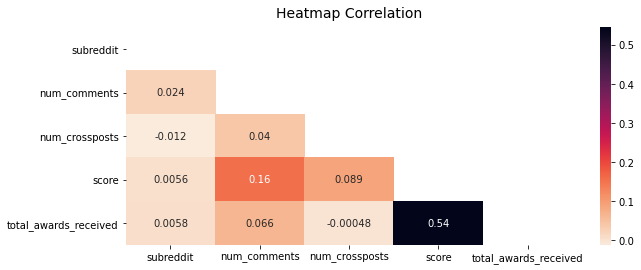

In [11]:
#heatmap cell size
plt.figure(figsize = (10, 4))

#correlation matrix
corr = df_both.iloc[:, 0:6].corr()

#mask for upper triangle of heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

heatmap = sns.heatmap(corr, annot=True, cmap='rocket_r', mask=mask);

heatmap.set_title('Heatmap Correlation', pad=10.0, fontsize=14);

plt.savefig('../plots/heatmap.png', bbox_inches="tight", dpi=300);

plt.show;


Focusing on the values on the leftmost section of the heatmap, the numerical columns do not seem to have much correlation with the subreddit column judging from how small the correlation values to the subreddit column is.

<b>Therefore, for our modelling, we will not be using any of these numerical columns and will instead focus on the texts (cleaned_texts column) to help in the classification.</b>

### N_grams

Different N_grams range will give us different top frequent words which will help with classification in our model depending on the context formed.

Here, we will take a look at the top 15 frequent words for a few different N_gram values and see how each differs before deciding on a range we want to feed into GridSearchCV for optimisation.

#### Combined Dataframe

We will first analyse the top 15 frequent words in the combined dataframe containing both AMD and NVIDIA.

##### Unigram (1 gram) top 15 words

In [12]:
#vectorise text
cvec_uni = CountVectorizer(ngram_range=(1,1), max_features=3000)

In [13]:
cleaned_cvec_uni = cvec_uni.fit_transform(df_both['cleaned_texts'])

In [14]:
#convert into dataframe to plot top occuring words
cleaned_cvec_uni_df = pd.DataFrame(cleaned_cvec_uni.todense(), columns=cvec_uni.get_feature_names())

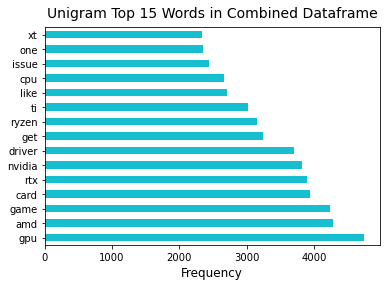

In [15]:
combine_uni_ax = cleaned_cvec_uni_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='C9');

combine_uni_ax.set_title('Unigram Top 15 Words in Combined Dataframe', pad=10.0, fontsize=14);
combine_uni_ax.set_xlabel('Frequency', fontsize=12);

plt.show();

##### Bigram (2 grams) top 15 words

In [16]:
#vectorise text
cvec_bi = CountVectorizer(ngram_range=(2,2), max_features=3000)

In [17]:
cleaned_cvec_bi = cvec_bi.fit_transform(df_both['cleaned_texts'])

In [18]:
#convert into dataframe to plot top occuring words
cleaned_cvec_bi_df = pd.DataFrame(cleaned_cvec_bi.todense(), columns=cvec_bi.get_feature_names())

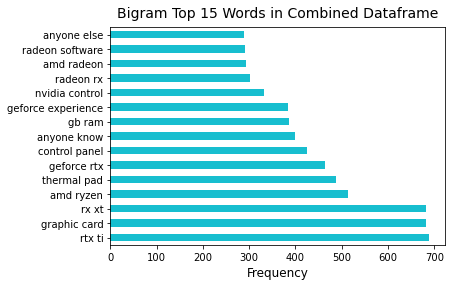

In [19]:
combine_bi_ax = cleaned_cvec_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='C9');

combine_bi_ax.set_title('Bigram Top 15 Words in Combined Dataframe', pad=10.0, fontsize=14);
combine_bi_ax.set_xlabel('Frequency', fontsize=12);

plt.show();

##### Trigram (3 grams) top 15 words

In [20]:
#vectorise text
cvec_tri = CountVectorizer(ngram_range=(3,3), max_features=3000)

In [21]:
cleaned_cvec_tri = cvec_tri.fit_transform(df_both['cleaned_texts'])

In [22]:
#convert into dataframe to plot top occuring words
cleaned_cvec_tri_df = pd.DataFrame(cleaned_cvec_tri.todense(), columns=cvec_tri.get_feature_names())

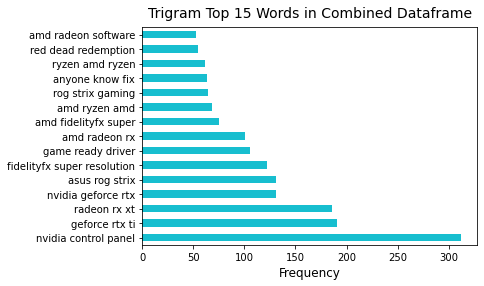

In [23]:
combine_tri_ax = cleaned_cvec_tri_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='C9');

combine_tri_ax.set_title('Trigram Top 15 Words in Combined Dataframe', pad=10.0, fontsize=14);
combine_tri_ax.set_xlabel('Frequency', fontsize=12);

plt.show();

##### Quadgram (4 grams) top 15 words

In [24]:
#vectorise text
cvec_quad = CountVectorizer(ngram_range=(4,4), max_features=3000)

In [25]:
cleaned_cvec_quad = cvec_quad.fit_transform(df_both['cleaned_texts'])

In [26]:
#convert into dataframe to plot top occuring words
cleaned_cvec_quad_df = pd.DataFrame(cleaned_cvec_quad.todense(), columns=cvec_quad.get_feature_names())

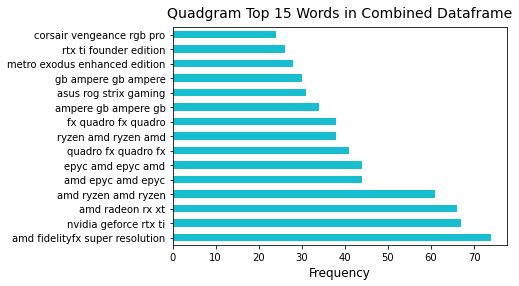

In [27]:
combine_quad_ax = cleaned_cvec_quad_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='C9');

combine_quad_ax.set_title('Quadgram Top 15 Words in Combined Dataframe', pad=10.0, fontsize=14);
combine_quad_ax.set_xlabel('Frequency', fontsize=12);

plt.show();

Comparing the N_grams above, we see that the bigram and trigram seems to give the most useful word combinations as they make more sense and gives more context than the unigram.

Quadgram, on the other hand, seems to have a tendency of returning lines with repeated words like "amd ryzen amd ryzen". This does not add more value to what was found using bigram and trigram. 

<b>Therefore, we will run N_gram ranges from 1 to 3 through GridSearchCV to pull out the optimal N_gram for each model.</b>

Next, we will look at the top 15 frequent words of the AMD and NVIDIA dataframe respectively, using the 2 different N_grams we found to be most useful above (bigrams and trigrams).

The purpose in doing this is to determine if there is a distinct difference between the 2 subreddits with regards to the words and context formed. 

If the frequently found words in both subreddits are extremely similar, there is a high chance that the model will not be able to classify correctly.

Additionally, analysing the list of most frequently used words unique to each subreddit may allow us to gain additional insight on what can be done further to improve the model's predictions and classifications.

#### AMD Only

##### AMD Bigrams (2 grams) top 15 words

In [28]:
#vectorise text
cvec_amd_bi = CountVectorizer(ngram_range=(2,2), max_features=3000)

In [29]:
cleaned_cvec_amd_bi = cvec_amd_bi.fit_transform(amd_cleaned['cleaned_texts'])

In [30]:
#convert into dataframe to plot top occuring words
cleaned_cvec_amd_bi_df = pd.DataFrame(cleaned_cvec_amd_bi.todense(), columns=cvec_amd_bi.get_feature_names())

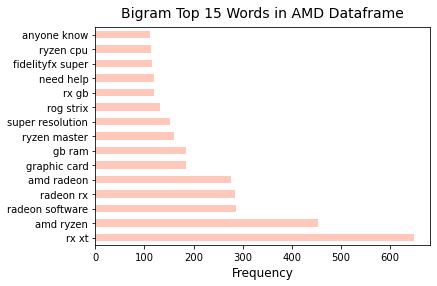

In [31]:
amd_bi_ax = cleaned_cvec_amd_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='#FFC8BA');

amd_bi_ax.set_title('Bigram Top 15 Words in AMD Dataframe', pad=10.0, fontsize=14);
amd_bi_ax.set_xlabel('Frequency', fontsize=12);

plt.show();

##### AMD Trigrams (3 grams) top 15 words

In [32]:
#vectorise text
cvec_amd_tri = CountVectorizer(ngram_range=(3,3), max_features=3000)

In [33]:
cleaned_cvec_amd_tri = cvec_amd_tri.fit_transform(amd_cleaned['cleaned_texts'])

In [34]:
#convert into dataframe to plot top occuring words
cleaned_cvec_amd_tri_df = pd.DataFrame(cleaned_cvec_amd_tri.todense(), columns=cvec_amd_tri.get_feature_names())

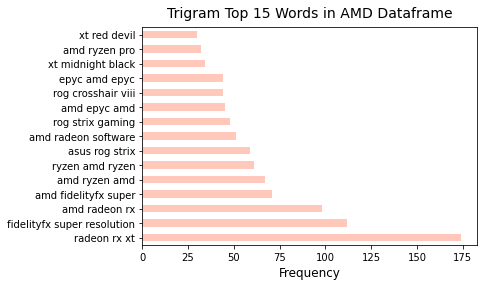

In [35]:
amd_tri_ax = cleaned_cvec_amd_tri_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='#FFC8BA');

amd_tri_ax.set_title('Trigram Top 15 Words in AMD Dataframe', pad=10.0, fontsize=14);
amd_tri_ax.set_xlabel('Frequency', fontsize=12);

plt.savefig('../plots/amd_tri_top15.png', bbox_inches="tight", dpi=300)

plt.show();

#### NVIDIA Only

##### NVIDIA Bigrams (2 grams) top 15 words

In [36]:
#vectorise text
cvec_nvidia_bi = CountVectorizer(ngram_range=(2,2), max_features=3000)

In [37]:
cleaned_cvec_nvidia_bi = cvec_nvidia_bi.fit_transform(nvidia_cleaned['cleaned_texts'])

In [38]:
#convert into dataframe to plot top occuring words
cleaned_cvec_nvidia_bi_df = pd.DataFrame(cleaned_cvec_nvidia_bi.todense(), columns=cvec_nvidia_bi.get_feature_names())

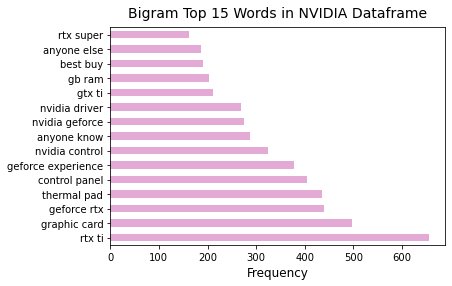

In [39]:
nvidia_bi_ax = cleaned_cvec_nvidia_bi_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='#E3AAD6');

nvidia_bi_ax.set_title('Bigram Top 15 Words in NVIDIA Dataframe', pad=10.0, fontsize=14);
nvidia_bi_ax.set_xlabel('Frequency', fontsize=12);

plt.show();

##### NVIDIA Trigrams (3 grams) top 15 words

In [40]:
#vectorise text
cvec_nvidia_tri = CountVectorizer(ngram_range=(3,3), max_features=3000)

In [41]:
cleaned_cvec_nvidia_tri = cvec_nvidia_tri.fit_transform(nvidia_cleaned['cleaned_texts'])

In [42]:
#convert into dataframe to plot top occuring words
cleaned_cvec_nvidia_tri_df = pd.DataFrame(cleaned_cvec_nvidia_tri.todense(), columns=cvec_nvidia_tri.get_feature_names())

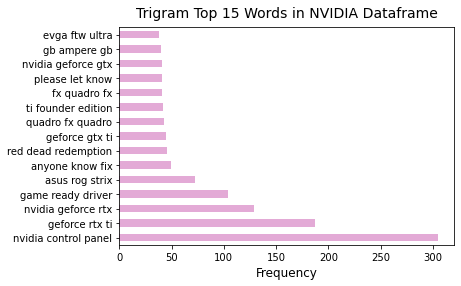

In [43]:
nvidia_tri_ax = cleaned_cvec_nvidia_tri_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color='#E3AAD6');

nvidia_tri_ax.set_title('Trigram Top 15 Words in NVIDIA Dataframe', pad=10.0, fontsize=14);
nvidia_tri_ax.set_xlabel('Frequency', fontsize=12);

plt.savefig('../plots/nvidia_tri_top15.png', bbox_inches="tight", dpi=300)

plt.show();

Comparing the N-gram plots for both AMD and NVIDIA, we see that the most frequently used words are largely different between the 2 subreddits.

Our models should be able to achieve our goal of learning and classifying the 2 subreddits properly.

In addition, words like 'ryzen' or 'geforce' seem to appear very frequently in the AMD and NVIDIA subreddits respectively. These words are actually from the product models of AMD and NVIDIA and are therefore unique to their respective subreddits.

This information would be important for us in classification and can be included into our recommendations for customer questions to always include their product models.

Next, we compare the number of words before text processing with the number of words after text processing. This will give us an idea of how much 'noise' was in the data we scrapped, which would have negatively affected our final model's subreddit prediction.

In [44]:
#define a function that counts the number of words in the data
def list_to_count(text_column):

    #change to lowercase
    lower_step2 = [word.lower() for word in text_column]
    
    #split words in the list of text
    split_list = str(lower_step2).split()
    
    return len(split_list)

In [45]:
#word count of texts in dataframe before text processing 
words_before = list_to_count(df_both['title_selftext'])

words_before

949160

In [46]:
#word count of texts in dataframe after text processing
words_after = list_to_count(df_both['cleaned_texts'])

words_after

517626

The number of words reduced from 950883 to 518593 after text processing, which is almost a 50% drop.

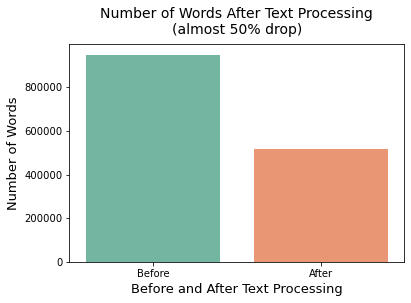

In [47]:
#plot bar graph to show drop

words = {'words_before': words_before, 'words_after': words_after}
words_df = pd.DataFrame(words, index=['words'])

words_df_ax = sns.barplot(data=words_df, order=['words_before', 'words_after'], palette=('Set2'))

words_df_ax.set_title('Number of Words After Text Processing\n(almost 50% drop)', pad=10.0, fontsize=14);
words_df_ax.set_ylabel('Number of Words', fontsize=13);
words_df_ax.set_xlabel('Before and After Text Processing', fontsize=13);
words_df_ax.set_xticklabels(labels=['Before', 'After'], rotation=360);

plt.savefig('../plots/WordCount_BeforeAfter.png', bbox_inches="tight", dpi=300);

plt.show();

This removes a lot of dirty data that would have messed with our classification predictions and caused inaccuracies in the modelling. The data is now much more focused on the important keywords that will aid in the classification predictions.

## Modelling With Data Visualisations

For the modelling, we will be using 3 different types of models, based on what was learned so far:
1. Logistic Regression
2. Multinomial Naive Bayes
3. Decision Tree

We will also be using 2 types of Vectorizers: 
1. CountVectorizer 
2. TfidfVectorizer

The following is the list of different combinations that we will be attempting:
1. CountVectorizer with Multinomial Naive Bayes
2. TfidfVectorizer with Multinomial Naive Bayes
3. CountVectorizer with Logistic Regression
4. TfidfVectorizer with Logisitic Regression
3. CountVectorizer with Decision Tree
4. TfidfVectorizer with Decision Tree

For our models, we will be comparing the Train and Test Accuracy score, the Sensitivity and Specificity score and also the Area Under Curve (AUC).

The scores and their comparisons will be explained under [Evaluation](#Evaluation), when we have collated the required values from all models.

### Train Test Split

Train size = 75%

Test size = 25%

In [48]:
#train test split --> stratify balances the distribution of data in each train test set 
X_train, X_test, y_train, y_test = train_test_split(df_both['cleaned_texts'], 
                                                    df_both['subreddit'], 
                                                    train_size=0.75, 
                                                    stratify=df_both['subreddit'])

### Baseline

Our Baseline will be the score we get in the event where we predict that everything in the test set is equal to 1, which in this case means we predict that everything in our test set is from the AMD subreddit.

In [49]:
#predict everything 
y_test.value_counts(normalize=True)

0    0.5
1    0.5
Name: subreddit, dtype: float64

The Baseline score is 50:50, indicating that each post has a 50% chance of being in either of the subreddits. This way of classification will definitely struggle with making accurate predictions.

We will run the different combination of models with tuned hyperparameters and see if any of the other models are able to beat this Baseline.

### Logistic Regression

#### CountVectorizer with Logistic Regression

In [50]:
#run start time in seconds
start = time()

#set pipeline for count vectorization then logistic regression
cv_lr = Pipeline([('cvec', CountVectorizer()), 
                  ('lr', LogisticRegression(solver='lbfgs', max_iter=10_000, penalty='l2'))
                 ])


#set parameters for the piepline that will go through gridsearchcv to find the optimal values
cv_lr_params = {'cvec__max_features': [3000, 5000], 
                'cvec__ngram_range': [(1,2), (1,3), (2,3)], 
                'cvec__min_df': [5, 7], #ignore words that appears in less than specified number of docs 
                'cvec__max_df': [0.1, 0.3], #ignore words that appears in more than specified % of docs 
                'lr__C': list(np.linspace(0.01, 1, 3))
               }

#instantiate GridSearchCV for tuning hyperparameters
gs_cv_lr = GridSearchCV(cv_lr, 
                        param_grid=cv_lr_params, 
                        cv=3)

#fit GridSearchCV to training data
gs_cv_lr.fit(X_train, y_train)

#amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')

Time taken to run: 235.09 seconds


In [51]:
#get the best optimised parameters
gs_cv_lr_est = gs_cv_lr.best_estimator_

print('Best Parameters:', gs_cv_lr_est)

Best Parameters: Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.3, max_features=5000, min_df=5,
                                 ngram_range=(1, 3))),
                ('lr', LogisticRegression(C=0.505, max_iter=10000))])


In [52]:
#get the mean cross validated train score
gs_cv_lr_train = gs_cv_lr.best_score_.round(3)

gs_cv_lr_train

0.868

In [53]:
#get the test score
gs_cv_lr_test = gs_cv_lr.score(X_test, y_test).round(3)

gs_cv_lr_test

0.87

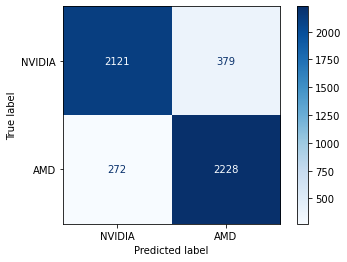

In [54]:
#plotting confusion matrix where 1 = AMD (Positives) and 0 = NVIDIA (Negatives)
metrics.plot_confusion_matrix(gs_cv_lr, X_test, y_test, cmap='Blues', 
                              values_format='d', display_labels=['NVIDIA', 'AMD']);

In [55]:
#calculating sensitivity and specificity to see how good our model is at classifying both classes on test set
tn1, fp1, fn1, tp1 = metrics.confusion_matrix(y_test, gs_cv_lr.predict(X_test)).ravel()

sens1 = (tp1 / (tp1 + fn1)).round(2)
spec1 = (tn1 / (tn1 + fp1)).round(2)

print(sens1)
print(spec1)

0.89
0.85


In [56]:
#area under curve score on test set --> measure of ability to distinguish between positive and negative classes
#higher value = model is better at classifying true positives and true negatives correctly
gs_cv_lr_auc = metrics.roc_auc_score(y_test, gs_cv_lr.predict_proba(X_test)[:, 1]).round(3)

gs_cv_lr_auc

0.949

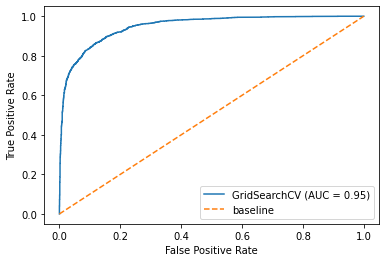

In [57]:
#get the area under curve score --> measure of the ability to distinguish between the positive and negative classes
metrics.plot_roc_curve(gs_cv_lr, X_test, y_test)
plt.plot([0, 1], [0, 1], label='baseline', linestyle='--')
plt.legend();

#### TfidfVectorizer with Logisitic Regression

In [58]:
#run start time in seconds
start = time()

#set pipeline for tfidf vectorization then logistic regression
tfidf_lr = Pipeline([('tfidf', TfidfVectorizer()), 
                     ('lr', LogisticRegression(solver='lbfgs', max_iter=10_000, penalty='l2'))
                    ])


#set parameters for the piepline that will go through gridsearchcv to find the optimal values
tfidf_lr_params = {'tfidf__max_features': [1000, 3000], 
                   'tfidf__ngram_range': [(1,2), (1,3), (2,3)], 
                   'tfidf__min_df': [2, 3], #ignore words that appears in less than specified number of docs 
                   'tfidf__max_df': [0.1, 0.3], #ignore words that appears in more than specified % of docs 
                   'lr__C': list(np.linspace(0.01, 2.0, 3))
                  }

#instantiate GridSearchCV for tuning hyperparameters
gs_tfidf_lr = GridSearchCV(tfidf_lr, 
                           param_grid=tfidf_lr_params, 
                           cv=3)

#fit GridSearchCV to training data
gs_tfidf_lr.fit(X_train, y_train)

#amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')

Time taken to run: 226.93 seconds


In [59]:
#get best optimised parameters
gs_tfidf_lr_est = gs_tfidf_lr.best_estimator_

print('Best Parameters:', gs_tfidf_lr_est)

Best Parameters: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.3, max_features=3000, min_df=2,
                                 ngram_range=(1, 2))),
                ('lr', LogisticRegression(C=1.005, max_iter=10000))])


In [60]:
#get mean cross validated trains score
gs_tfidf_lr_train = gs_tfidf_lr.best_score_.round(3)

gs_tfidf_lr_train

0.874

In [61]:
#get test score
gs_tfidf_lr_test = gs_tfidf_lr.score(X_test, y_test).round(3)

gs_tfidf_lr_test

0.874

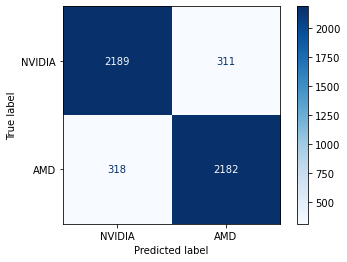

In [62]:
#plotting confusion matrix where 1 = AMD (Positives) and 0 = NVIDIA (Negatives)
metrics.plot_confusion_matrix(gs_tfidf_lr, X_test, y_test, cmap='Blues', 
                              values_format='d', display_labels=['NVIDIA', 'AMD']);

In [63]:
#calculating sensitivity and specificity to see how good our model is at classifying both classes on test set
tn2, fp2, fn2, tp2 = metrics.confusion_matrix(y_test, gs_tfidf_lr.predict(X_test)).ravel()

sens2 = (tp2 / (tp2 + fn2)).round(2)
spec2 = (tn2 / (tn2 + fp2)).round(2)

print(sens2)
print(spec2)

0.87
0.88


In [64]:
#area under curve score on test set --> measure of ability to distinguish between positive and negative classes
#higher value = model is better at classifying true positives and true negatives correctly
gs_tfidf_lr_auc = metrics.roc_auc_score(y_test, gs_tfidf_lr.predict_proba(X_test)[:, 1]).round(3)

gs_tfidf_lr_auc

0.95

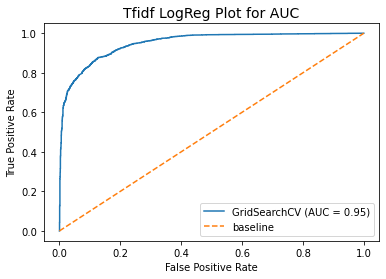

In [65]:
#get the area under curve score --> measure of the ability to distinguish between the positive and negative classes
tfidf_lr_auc_ax = metrics.plot_roc_curve(gs_tfidf_lr, X_test, y_test)

plt.title('Tfidf LogReg Plot for AUC', fontsize=14)
plt.plot([0, 1], [0, 1], label='baseline', linestyle='--')
plt.legend();

plt.savefig('../plots/tfidf_logreg_auc', bbox_inches="tight", dpi=300)

plt.show();

### Multinomial Naive Bayes

#### CountVectorizer with Multinomial Naive Bayes

In [66]:
#run start time in seconds
start = time()

#set pipeline for count vectorization then multinomial naive bayes
cv_multNB = Pipeline([('cvec', CountVectorizer()), 
                     ('multNB', MultinomialNB())
                    ])


#set parameters for the piepline that will go through gridsearchcv to find the optimal values
cv_multNB_params = {'cvec__max_features': [5000, 7000], 
                    'cvec__ngram_range': [(1,2), (1,3), (2,3)],
                    'cvec__min_df': [2, 3], #ignore words that appears in less than specified number of docs 
                    'cvec__max_df': [0.3, 0.4], #ignore words that appears in more than specified % of docs 
                    'multNB__alpha': list(np.linspace(0.1, 5.0, 3))
                   }

#instantiate GridSearchCV for tuning hyperparameters
gs_cv_multNB = GridSearchCV(cv_multNB, 
                            param_grid=cv_multNB_params, 
                            cv=3)

#fit GridSearchCV to training data
gs_cv_multNB.fit(X_train, y_train)

#amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')

Time taken to run: 221.59 seconds


In [67]:
#get best optimised parameters
gs_cv_multNB_est = gs_cv_multNB.best_estimator_

print('Best Parameters:', gs_cv_multNB_est)

Best Parameters: Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.3, max_features=5000, min_df=2,
                                 ngram_range=(1, 2))),
                ('multNB', MultinomialNB(alpha=5.0))])


In [68]:
#get mean cross validated train score
gs_cv_multNB_train = gs_cv_multNB.best_score_.round(3)

gs_cv_multNB_train

0.862

In [69]:
#get test score
gs_cv_multNB_test = gs_cv_multNB.score(X_test, y_test).round(3)

gs_cv_multNB_test

0.857

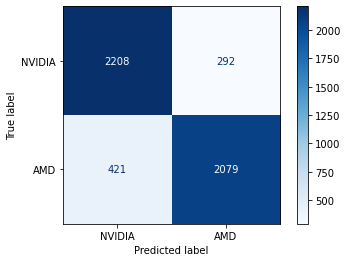

In [70]:
#plotting confusion matrix where 1 = AMD (Positives) and 0 = NVIDIA (Negatives)
metrics.plot_confusion_matrix(gs_cv_multNB, X_test, y_test, cmap='Blues', 
                              values_format='d', display_labels=['NVIDIA', 'AMD']);

In [71]:
#calculating sensitivity and specificity to see how good our model is at classifying both classes on test set
tn3, fp3, fn3, tp3 = metrics.confusion_matrix(y_test, gs_cv_multNB.predict(X_test)).ravel()

sens3 = (tp3 / (tp3 + fn3)).round(2)
spec3 = (tn3 / (tn3 + fp3)).round(2)

print(sens3)
print(spec3)

0.83
0.88


In [72]:
#area under curve score on test set --> measure of ability to distinguish between positive and negative classes
#higher value = model is better at classifying true positives and true negatives correctly
gs_cv_multNB_auc = metrics.roc_auc_score(y_test, gs_cv_multNB.predict_proba(X_test)[:, 1]).round(3)

gs_cv_multNB_auc

0.935

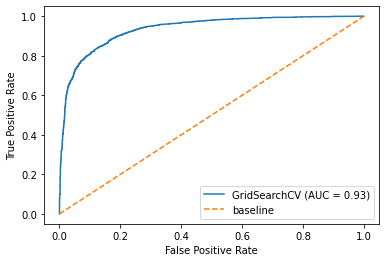

In [73]:
#get the area under curve score --> measure of the ability to distinguish between the positive and negative classes
metrics.plot_roc_curve(gs_cv_multNB, X_test, y_test)
plt.plot([0, 1], [0, 1], label='baseline', linestyle='--')
plt.legend();

#### TfidfVectorizer with Multinomial Naive Bayes

In [74]:
#run start time in seconds
start = time()

#set pipeline for tfidf vectorization then multinomial naive bayes
tfidf_multNB = Pipeline([('tfidf', TfidfVectorizer()), 
                        ('multNB', MultinomialNB())
                       ])


#set parameters for the piepline that will go through gridsearchcv to find the optimal values
tfidf_multNB_params = {'tfidf__max_features': [3000, 5000], 
                       'tfidf__ngram_range': [(1,2), (1,3), (2,3)], 
                       'tfidf__min_df': [2, 3], #ignore words that appears in less than specified number of docs 
                       'tfidf__max_df': [0.3, 0.4], #ignore words that appears in more than specified % of docs 
                       'multNB__alpha': list(np.linspace(0.1, 5.0, 3))}

#instantiate GridSearchCV for tuning hyperparameters
gs_tfidf_multNB = GridSearchCV(tfidf_multNB, 
                               param_grid=tfidf_multNB_params, 
                               cv=3)

#fit GridSearchCV to training data
gs_tfidf_multNB.fit(X_train, y_train)

#amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2), 'seconds')

Time taken to run: 220.51 seconds


In [75]:
#get best optimised parameters
gs_tfidf_multNB_est = gs_tfidf_multNB.best_estimator_

print('Best Parameters:', gs_tfidf_multNB_est)

Best Parameters: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.3, max_features=5000, min_df=3,
                                 ngram_range=(1, 3))),
                ('multNB', MultinomialNB(alpha=5.0))])


In [76]:
#get mean cross validated train score
gs_tfidf_multNB_train = gs_tfidf_multNB.best_score_.round(3)

gs_tfidf_multNB_train

0.856

In [77]:
#get test score
gs_tfidf_multNB_test = gs_tfidf_multNB.score(X_test, y_test).round(3)

gs_tfidf_multNB_test

0.856

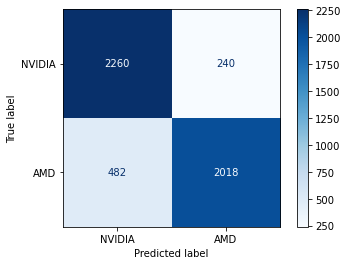

In [78]:
#plotting confusion matrix where 1 = AMD (Positives) and 0 = NVIDIA (Negatives)
metrics.plot_confusion_matrix(gs_tfidf_multNB, X_test, y_test, cmap='Blues', 
                              values_format='d', display_labels=['NVIDIA', 'AMD']);

In [79]:
#calculating sensitivity and specificity to see how good our model is at classifying both classes on test set
tn4, fp4, fn4, tp4 = metrics.confusion_matrix(y_test, gs_tfidf_multNB.predict(X_test)).ravel()

sens4 = (tp4 / (tp4 + fn4)).round(2)
spec4 = (tn4 / (tn4 + fp4)).round(2)

print(sens4)
print(spec4)

0.81
0.9


In [80]:
#area under curve score on test set --> measure of ability to distinguish between positive and negative classes
#higher value = model is better at classifying true positives and true negatives correctly
gs_tfidf_multNB_auc = metrics.roc_auc_score(y_test, gs_tfidf_multNB.predict_proba(X_test)[:, 1]).round(3)

gs_tfidf_multNB_auc

0.941

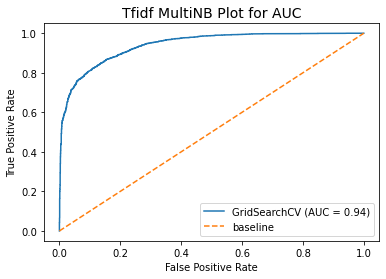

In [81]:
#get the area under curve score --> measure of the ability to distinguish between the positive and negative classes
metrics.plot_roc_curve(gs_tfidf_multNB, X_test, y_test)

plt.title('Tfidf MultiNB Plot for AUC', fontsize=14)
plt.plot([0, 1], [0, 1], label='baseline', linestyle='--')
plt.legend();

plt.savefig('../plots/tfidf_multinb_auc', bbox_inches="tight", dpi=300)

plt.show();

### Decision Tree

#### CountVectorizer with Decision Tree

In [82]:
#run start time in seconds
start = time()

#set pipeline for count vectorization then decision tree
cv_dt = Pipeline([('cv', CountVectorizer()), 
                  ('dt', DecisionTreeClassifier(criterion='entropy'))
                 ])


#set parameters for the piepline that will go through gridsearchcv to find the optimal values
cv_dt_params = {'cv__max_features': [1000, 3000], 
                'cv__ngram_range': [(1,2), (1,3), (2,3)], 
                'cv__min_df': [3, 5], #ignore words that appears in less than specified number of docs 
                'cv__max_df': [0.3, 0.5], #ignore words that appears in more than specified % of docs 
                'dt__max_depth': [5, 10], 
                'dt__ccp_alpha': [0.001, 0.01]}

#instantiate GridSearchCV for tuning hyperparameters
gs_cv_dt = GridSearchCV(cv_dt, 
                        param_grid=cv_dt_params, 
                        cv=3)

#fit GridSearchCV to training data
gs_cv_dt.fit(X_train, y_train)

#amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 2))

Time taken to run: 302.91


In [83]:
#get best optimised parameters
gs_cv_dt_est = gs_cv_dt.best_estimator_

print('Best Parameters:', gs_cv_dt_est)

Best Parameters: Pipeline(steps=[('cv',
                 CountVectorizer(max_df=0.3, max_features=3000, min_df=3,
                                 ngram_range=(1, 2))),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                                        max_depth=10))])


In [84]:
#get mean cross validated train score
gs_cv_dt_train = gs_cv_dt.best_score_.round(3)

gs_cv_dt_train

0.776

In [85]:
#get test score
gs_cv_dt_test = gs_cv_dt.score(X_test, y_test).round(3)

gs_cv_dt_test

0.769

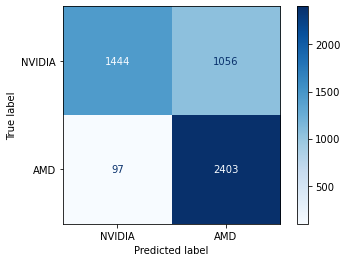

In [86]:
#plotting confusion matrix where 1 = AMD (Positives) and 0 = NVIDIA (Negatives)
metrics.plot_confusion_matrix(gs_cv_dt, X_test, y_test, cmap='Blues', 
                              values_format='d', display_labels=['NVIDIA', 'AMD']);

In [87]:
#calculating sensitivity and specificity to see how good our model is at classifying both classes on test set
tn5, fp5, fn5, tp5 = metrics.confusion_matrix(y_test, gs_cv_dt.predict(X_test)).ravel()

sens5 = (tp5 / (tp5 + fn5)).round(2)
spec5 = (tn5 / (tn5 + fp5)).round(2)

print(sens5)
print(spec5)

0.96
0.58


In [88]:
#area under curve score on test set --> measure of ability to distinguish between positive and negative classes
#higher value = model is better at classifying true positives and true negatives correctly
gs_cv_dt_auc = metrics.roc_auc_score(y_test, gs_cv_dt.predict_proba(X_test)[:, 1]).round(3)

gs_cv_dt_auc

0.876

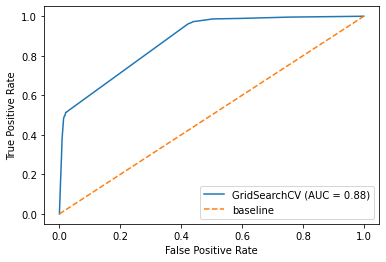

In [89]:
#get the area under curve score --> measure of the ability to distinguish between the positive and negative classes
metrics.plot_roc_curve(gs_cv_dt, X_test, y_test)
plt.plot([0, 1], [0, 1], label='baseline', linestyle='--')
plt.legend();

#### TfidfVectorizer with Decision Tree

In [90]:
#run start time in seconds
start = time()

#set pipeline for tfidf vectorization then decision tree
tfidf_dt = Pipeline([('tfidf', TfidfVectorizer()), 
                  ('dt', DecisionTreeClassifier(criterion='entropy'))
                 ])


#set parameters for the piepline that will go through gridsearchcv to find the optimal values
tfidf_dt_params = {'tfidf__max_features': [1000, 3000], 
                   'tfidf__ngram_range': [(1,2), (1,3), (2,3)], 
                   'tfidf__min_df': [3, 5], #ignore words that appears in less than specified number of docs 
                   'tfidf__max_df': [0.3, 0.5], #ignore words that appears in more than specified % of docs 
                   'dt__max_depth': [5, 10], 
                   'dt__ccp_alpha': [0.001, 0.01]}

#instantiate GridSearchCV for tuning hyperparameters
gs_tfidf_dt = GridSearchCV(tfidf_dt, 
                           param_grid=tfidf_dt_params, 
                           cv=3)

#fit GridSearchCV to training data
gs_tfidf_dt.fit(X_train, y_train)

#amount of time taken to run in seconds
time_taken = time() - start
print('Time taken to run:', round(time_taken, 3))

Time taken to run: 321.059


In [91]:
#get best optimised parameters
gs_tfidf_dt_est = gs_tfidf_dt.best_estimator_

print('Best Parameters:', gs_tfidf_dt_est)

Best Parameters: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 3))),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                                        max_depth=10))])


In [92]:
#get mean cross validated train score
gs_tfidf_dt_train = gs_tfidf_dt.best_score_.round(3)

gs_tfidf_dt_train

0.774

In [93]:
#get test score
gs_tfidf_dt_test = gs_tfidf_dt.score(X_test, y_test).round(3)

gs_tfidf_dt_test

0.763

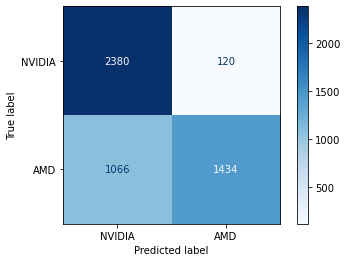

In [94]:
#plotting confusion matrix where 1 = AMD (Positives) and 0 = NVIDIA (Negatives)
metrics.plot_confusion_matrix(gs_tfidf_dt, X_test, y_test, cmap='Blues', 
                              values_format='d', display_labels=['NVIDIA', 'AMD']);

In [95]:
#calculating sensitivity and specificity to see how good our model is at classifying both classes on test set
tn6, fp6, fn6, tp6 = metrics.confusion_matrix(y_test, gs_tfidf_dt.predict(X_test)).ravel()

sens6 = (tp6 / (tp6 + fn6)).round(2)
spec6 = (tn6 / (tn6 + fp6)).round(2)

print(sens6)
print(spec6)

0.57
0.95


In [96]:
#area under curve score on test set --> measure of ability to distinguish between positive and negative classes
#higher value = model is better at classifying true positives and true negatives correctly
gs_tfidf_dt_auc = metrics.roc_auc_score(y_test, gs_tfidf_dt.predict_proba(X_test)[:, 1]).round(3)

gs_tfidf_dt_auc

0.878

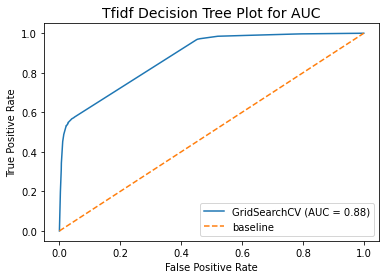

In [97]:
#get the area under curve score --> measure of the ability to distinguish between the positive and negative classes
metrics.plot_roc_curve(gs_tfidf_dt, X_test, y_test)

plt.title('Tfidf Decision Tree Plot for AUC', fontsize=14)
plt.plot([0, 1], [0, 1], label='baseline', linestyle='--')
plt.legend();

plt.savefig('../plots/tfidf_dt_auc', bbox_inches="tight", dpi=300)

plt.show();

## Evaluation

A summary of the performance of all our models are recorded in the table below:

|Model|Train Accuracy|Test Accuracy|Sensitivity|Specificity|AUC|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**Baseline**|-|0.500|-|-|-|
|||||||
|**CountVectorizer Logistic Regression**|0.867|0.880|0.895|0.866|0.955|
|||||||
|**TfidfVectorizer Logistic Regression**|0.870|0.876|0.870|0.883|0.955|
|||||||
|**CountVectorizer Multinomial Naive Bayes**|0.859|0.871|0.857|0.885|0.941|
|||||||
|**TfidfVectorizer Multinomial Naive Bayes**|0.856|0.862|0.823|0.902|0.946|
|||||||
|**CountVectorizer Decision Tree**|0.772|0.762|0.573|0.951|0.881|
|||||||
|**TfidfVectorizer Decision Tree**|0.764|0.760|0.564|0.958|0.869|


At one glance, we can see that all our models beat the Baseline as their Test Accuracies are higher.

One observation is that for the Logistic Regression and Multinomial Naive Bayes models, the Test Accuracy scores are slightly higher than the Train Accuracy. A reason for this might be that the hyperparameters for these models were not tuned to the optimal value, resulting in over-regularising which may cause Test Accuracy to become higher than Train Accuracy. This is a point for improvement and further tuning should be done if time permits.

In the next section, we will be taking a look at the definitions and explanations behind the following metrics:
- Train and Test Accuracy
- Sensitivity and Specificity 
- AUC

We will be comparing these metrics from all the models to decide on the best model.

Recall that our subreddits are classified as such:

|Subreddit|Numerical Value in Dataframes|Class|
|:---:|:---:|:---:|
|**AMD**|1|Positive|
|**NVIDIA**|0|Negative|

#### Accuracy:

$$Accuracy = \frac{\text{True Positives + True Negatives}}{\text{Total Predictions}}$$

The accuracy score tells us how accurate our model is in its classification, for both True Positives and True Negatives. It is the ratio of total number of correct classifications over total number of classifications overall. It basically measures the percentage of points correctly classified.

<b>A higher accuracy score is therefore desired as it indicates that the model is good at classifying.</b>

#### Sensitivity:

$$Sensitivity = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

Also called the True Positive Rate. It is the ratio of True Positives to All Actual Positives.

The higher the Sensitivity, the better our model is at predicting Positives (in this case, predicting the AMD subreddit).

#### Specificity:

$$Specificity = \frac{\text{True Negatives}}{\text{True Negatives + False Positives}}$$

Also called the True Negative Rate. It is the ratio of True Negatives to All Actual Negatives.

The higher the Specificity, the better our model is at predicting Negatives (in this case, predicting the NVIDIA subreddit).


<b>We would want a good balance between Sensitivity and Specificity since the goal is to correctly classify posts into the subreddit they belong to.</b>

#### AUC

The area under the Receiver Operating Characteristics (ROC) curve is called the AUC. The ROC plot is made up of the False Positive Rate (FPR) on the x-axis versus the True Positive Rate (TPR) on the y-axis. A good model will assign higher probability to a randomly chosen positive point than a randomly chosen negative point, represented by a curve that bows toward the top left of the plot, resulting in larger AUC.

In a model where AUC is large, there will be lesser overlapping seen in the plotting of predicted probabilities by actual values.

<b>The larger the AUC, the better and more capable the model is at distinguishing between the Positive and Negative classes.</b>

We will be comparing the models and as we go down the list, we will be eliminating the models that are deemed to be unable to perform as well. The final model that has the best overall performance will be selected. 

### CountVec LogReg vs TfidfVec LogReg

|Model|Train Accuracy|Test Accuracy|Sensitivity|Specificity|AUC|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**CountVectorizer Logistic Regression**|0.867|0.880|0.895|0.866|0.955|
|||||||
|**TfidfVectorizer Logistic Regression**|0.870|0.876|0.870|0.883|0.955|

<b>Accuracy</b>

The CountVec LogReg model scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec LogReg model also scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec LogReg model and CountVec LogReg model both has similar scores for Train and Test Accuracies.

The difference between the Train and Test Accuracy is smaller for TfidfVec LogReg model, so the TfidfVec LogReg model seems to be a better choice in terms of Accuracy score.


<b>Sensitivity and Specificity</b>

The TfidfVec LogReg model scores slightly lower than the CountVec LogReg model for Sensitivity, indicating that the TfidfVec LogReg model is very slightly worse off at predicting Positives (AMD subreddit).

The TfidfVec LogReg model, however, scores higher than the CountVec LogReg model for Specificity, indicating that the TfidfVec LogReg model is better at predicting Negatives (NVIDIA subreddit) in comparison.

Overall, both models score similarly for Sensitivity and Specificity.

As the difference between the TfidfVec LogReg model's Sensitivity and Specificity score is smaller, we can say that the TfidfVec LogReg model would be a better choice at predicting subreddits overall.


<b>AUC</b>

AUC is high for both models and are the same value. They distinguish between Positives (AMD subreddit) and Negatives (NVIDIA subreddit) similarly.


In summary, the TfidfVec LogReg model seems to perform slightly better than the CountVec LogReg model as the Train and Test Accuracy difference is smaller, has better balance between Sensitivity and Specificity while still scoring highly, and also has high AUC.

<b>We will select the TfidfVec LogReg model from the 2 and move on to compare it with the next model.</b>

### TfidfVec LogReg vs CountVec MultiNB

|Model|Train Accuracy|Test Accuracy|Sensitivity|Specificity|AUC|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**TfidfVectorizer Logistic Regression**|0.870|0.876|0.870|0.883|0.955|
|||||||
|**CountVectorizer Multinomial Naive Bayes**|0.859|0.871|0.857|0.885|0.941|

<b>Accuracy</b>

The TfidfVec LogReg model scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The CountVec MultiNB model also scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec LogReg model and CountVec MultiNB model both has similar scores for Train and Test Accuracies, with the TfidfVec LogReg model scoring higher in both Train and Test Accuracies overall.

Therefore, the TfidfVec LogReg model seems to be a better choice in terms of Accuracy score.


<b>Sensitivity and Specificity</b>

The TfidfVec LogReg model scores slightly higher than the CountVec MultiNB model for Sensitivity, indicating that the TfidfVec LogReg model is very slightly better at predicting Positives (AMD subreddit).

The TfidfVec LogReg model and the CountVec MultiNB model scores similarly for Specificity, indicating that both models are similarly good at predicting Negatives (NVIDIA subreddit).

Overall, both models score similarly for Sensitivity and Specificity, with TfidfVec LogReg model having a very slight edge in Positives (AMD subreddit) prediction.

Therefore, the TfidfVec LogReg model seems to be a better choice at predicting subreddits overall.


<b>AUC</b>

AUC is high for both models with TfidfVec LogReg model being slightly higher, indicating that it is slightly better at distinguishing between Positives (AMD subreddit) and Negatives (NVIDIA subreddit).


In summary, the TfidfVec LogReg model seems to perform slightly better than the CountVec MultiNB model as a whole.

<b>We will select the TfidfVec LogReg model from the 2 and move on to compare it with the next model.</b>

### TfidfVec LogReg vs TfidfVec MultiNB

|Model|Train Accuracy|Test Accuracy|Sensitivity|Specificity|AUC|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**TfidfVectorizer Logistic Regression**|0.870|0.876|0.870|0.883|0.955|
|||||||
|**TfidfVectorizer Multinomial Naive Bayes**|0.856|0.862|0.823|0.902|0.946|

<b>Accuracy</b>

The TfidfVec LogReg model scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec MultiNB model also scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec LogReg model and TfidfVec MultiNB model both has similar scores for Train and Test Accuracies, but the TfidfVec LogReg model scores slightly higher in both Train and Test Accuracies.

Therefore, the TfidfVec LogReg model seems to be a better choice in terms of Accuracy score.


<b>Sensitivity and Specificity</b>

The TfidfVec LogReg model scores slightly higher than the TfidfVec MultiNB model for Sensitivity, indicating that the TfidfVec LogReg model is slightly better at predicting Positives (AMD subreddit).

The TfidfVec MultiNB model scores slightly higher for Specificity, indicating that it is slightly better at predicting Negatives (NVIDIA subreddit).

Overall, both models score similarly for Sensitivity and Specificity, with TfidfVec LogReg model being more well rounded in Positives (AMD subreddit) and Negatives (NVIDIA subreddit) prediction.

Therefore, the TfidfVec LogReg model seems to be a better choice at predicting subreddits overall.


<b>AUC</b>

AUC is high for both models with TfidfVec LogReg model being slightly higher, indicating that it is slightly better at distinguishing between Positives (AMD subreddit) and Negatives (NVIDIA subreddit).


In summary, the TfidfVec LogReg model seems to perform slightly better than the TfidfVec MultiNB model as a whole.

<b>We will select the TfidfVec LogReg model from the 2 and move on to compare it with the next model.</b>

### TfidfVec MultinomialNB vs CountVec Decision Tree

|Model|Train Accuracy|Test Accuracy|Sensitivity|Specificity|AUC|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**TfidfVectorizer Logistic Regression**|0.870|0.876|0.870|0.883|0.955|
|||||||
|**CountVectorizer Decision Tree**|0.772|0.762|0.573|0.951|0.881|

<b>Accuracy</b>

The TfidfVec LogReg model scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The CountVec Decision Tree model also scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec LogReg model scores higher than the CountVec Decision Tree for both Train and Test Accuracies.

Therefore, the TfidfVec LogReg model is a better choice in terms of Accuracy score.


<b>Sensitivity and Specificity</b>

The TfidfVec LogReg model scores much higher than the CountVec Decision Tree model for Sensitivity, indicating that the TfidfVec LogReg model is much better at predicting Positives (AMD subreddit).

The CountVec Decision Tree model scores better for Specificity, indicating that it is better at predicting Negatives (NVIDIA subreddit).

The TfidfVec LogReg model is more well rounded in Positives (AMD subreddit) and Negatives (NVIDIA subreddit) prediction. The CountVec Decision Tree model is very good at predicting Negatives (NVIDIA subreddit) but is very bad in predicting Positives (AMD subreddit).

Therefore, the TfidfVec LogReg model seems to be a better choice at predicting subreddits overall.


<b>AUC</b>

AUC is high for both models, with TfidfVec LogReg model being slightly higher, indicating that it is better at distinguishing between Positives (AMD subreddit) and Negatives (NVIDIA subreddit).


In summary, the TfidfVec LogReg model seems to perform better than the CountVec Decision Tree model as a whole.

<b>We will select the TfidfVec LogReg model from the 2 and move on to compare it with the next model.</b>

### TfidfVec MultinomialNB vs TfidfVec Decision Tree

|Model|Train Accuracy|Test Accuracy|Sensitivity|Specificity|AUC|
|:---:|:---:|:---:|:---:|:---:|:---:|
|**TfidfVectorizer Logistic Regression**|0.870|0.876|0.870|0.883|0.955|
|||||||
|**TfidfVectorizer Decision Tree**|0.764|0.760|0.564|0.958|0.869|

<b>Accuracy</b>

The TfidfVec LogReg model scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec Decision Tree model also scores similarly for Train and Test Accuracy. This indicates there is no overfitting in the model.

The TfidfVec LogReg model scores higher than the TfidfVec Decision Tree for both Train and Test Accuracies.

Therefore, the TfidfVec LogReg model is a better choice in terms of Accuracy score.


<b>Sensitivity and Specificity</b>

The TfidfVec LogReg model scores much higher than the TfidfVec Decision Tree model for Sensitivity, indicating that the TfidfVec LogReg model is much better at predicting Positives (AMD subreddit).

The TfidfVec Decision Tree model scores better for Specificity, indicating that it is better at predicting Negatives (NVIDIA subreddit).

The TfidfVec LogReg model is more well rounded in Positives (AMD subreddit) and Negatives (NVIDIA subreddit) prediction. The TfidfVec Decision Tree model is very good at predicting Negatives (NVIDIA subreddit) but is very bad in predicting Positives (AMD subreddit).

Therefore, the TfidfVec LogReg model seems to be a better choice at predicting subreddits overall.


<b>AUC</b>

AUC is high for both models, with TfidfVec LogReg model being slightly higher, indicating that it is better at distinguishing between Positives (AMD subreddit) and Negatives (NVIDIA subreddit).


In summary, the TfidfVec LogReg model seems to perform better than the TfidfVec Decision Tree model as a whole and we will select it as the best model.

Best Model Chosen after comparing the various metrics: <b>TfidfVectorizer Logistic Regression model</b>

### Chosen Model Hyperparameters

The optimised hyperparameters for **TfidfVectorizer Logistic Regression model** found are shown below.

<b>TfidfVectorizer</b>:

max_features = 3000

ngram_range = (1, 3)

min_df = 2

max_df = 0.3


<b>Logistic Regression</b>:

solver = 'lgfbs'

max_iter = 10 000

penalty = 'l2'

C = 1.005

Further tuning of these hyperparameters will be required to improve the scores and create a more robust classifier model before the model is entirely production ready.

## Conclusions and Recommendations

The data used in the modelling is simple and used only the text data from the title + selftext column. This is because our EDA revealed that the other numerical datas that were thought to potentially have an impact on the classification turned out to have very little correlation with the target variable, the subreddits, and were therefore not used.

EDA also showed that the graphic card model names for AMD and NVIDIA were important in helping with classfication as they appear frequently and are unique to their respective brands and subreddits.

The best model for accurately classifying the posts to their respective subreddits is the TfidfVectorizer Logistic Regression, after analysing and determined to have the most well rounded and high scores overall for Train and Test Accuracies, Area Under Curve, and Sensitivity & Specificity metrics.

As mentioned in the problem statement/background, this basic classification will serve as the first phase and focuses on creating an accurate classifier by identifying keywords and predicting the subreddits. Second phase will see the classifier start to identify specific posts with solutions.

In order to continuously improve on our classifier and get it ready for the project's second phase, the following can be done:
- Test out with other different types of models
- Further tune the hyerparameters
- Software team to use Customer ID and Product ID to automatically pull out the brand and model of the customer's graphic card, since we found out from our EDA that brand and model is important in helping with classification
- Scrap additional solutions from other AMD and NVIDIA forums on top of reddit

Recommendations for the future of this project beyond the project second phase:
- Turn the classifier into a complete AI recommendation solution for all customers inquiries, not just limited to AMD and NVIDIA graphic cards